# KNN Classifier

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Define evaluation method

In [70]:
def evaluate_model(y_test, y_pred, y_prob):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score: {f1:.2f}")

    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

Multi-class / Multi-output no es soportado por el KNeighborsClassifier de scikit-learn, por lo tanto, se procederá a entrenar dos modelos diferentes utilizando cada uno una variable dependiente diferente

In [39]:
df = pd.read_csv("clusters.csv", header=0)

target_columns = [
    "IndexMorbilidad",
    "EscalaRiesgo",
]

id_columns = [
    "id_gdg",
    "origen_px"
]

X_columns_to_remove = target_columns + id_columns

X = df.drop(columns=X_columns_to_remove)
y1 = df["IndexMorbilidad"]
y2 = df["EscalaRiesgo"]

La variable dependiente "EscalaRiesgo" no puede ser de tipo string, así que se pasa por un LabelEncoder previo a pasarlo al modelo.

In [43]:
label_encoder = LabelEncoder()

y2_encoded = pd.DataFrame(label_encoder.fit_transform(y2))
# y2_encoded.drop(columns="EscalaRiesgo", inplace=True)

y2_encoded.head(5)


,0
0,2
1,2
2,2
3,1
4,2


## Tomando a IndexMorbilidad como variable dependiente

Accuracy: 0.64
F1 Score: 0.60
[[148  25   2   0]
 [ 50  24   3   0]
 [ 11   6   2   0]
 [  2   1   0   0]]


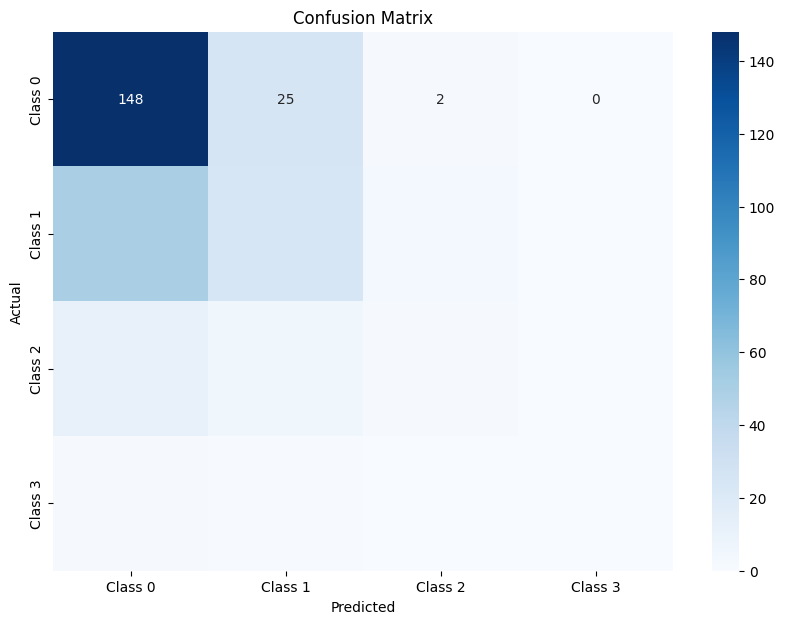

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77       175
         1.0       0.43      0.31      0.36        77
         2.0       0.29      0.11      0.15        19
         3.0       0.00      0.00      0.00         3

    accuracy                           0.64       274
   macro avg       0.35      0.32      0.32       274
weighted avg       0.59      0.64      0.60       274



/home/deck/Documents/School/Proyecto Integrador/Repositorio/MNA_ProyectoIntegrador-Equipo7/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deck/Documents/School/Proyecto Integrador/Repositorio/MNA_ProyectoIntegrador-Equipo7/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deck/Documents/School/Proyecto Integrador/Repositorio/MNA_ProyectoIntegrador-Equipo7/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Pre

In [74]:

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred, y_prob)

## Tomando a EscalaRiesgo como variable dependiente

Accuracy: 0.67
F1 Score: 0.66
[[  0   2   1]
 [  4  41  51]
 [  1  32 142]]


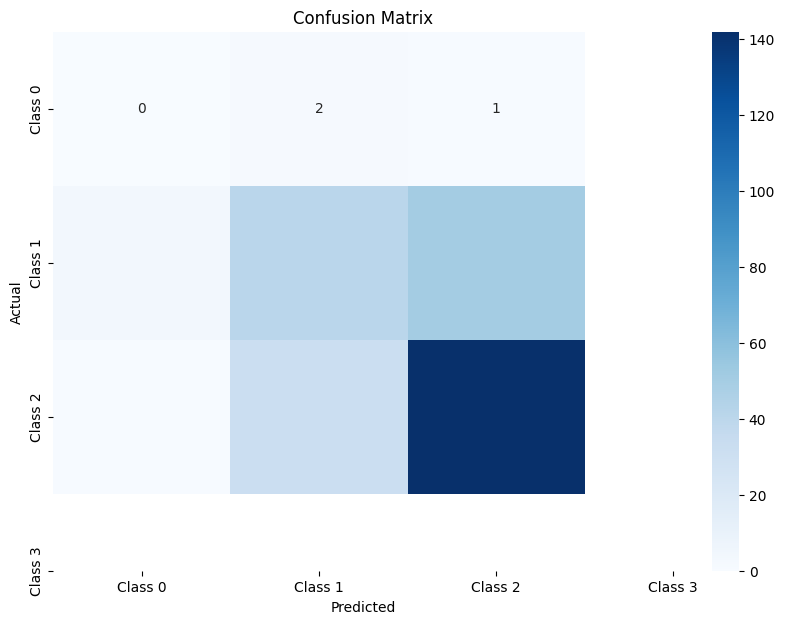

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.55      0.43      0.48        96
           C       0.73      0.81      0.77       175

    accuracy                           0.67       274
   macro avg       0.43      0.41      0.42       274
weighted avg       0.66      0.67      0.66       274



In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred, y_prob)